In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)


In [84]:
df = pd.read_csv('glass.csv')

In [85]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [86]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [87]:
df.shape

(214, 10)

In [88]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [89]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [90]:
df.duplicated().sum()

1

In [91]:
df = df.drop_duplicates()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [93]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


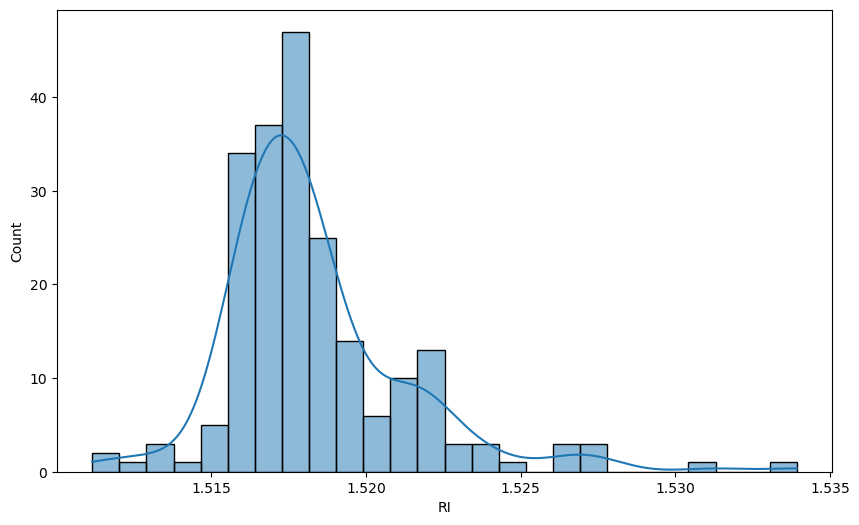

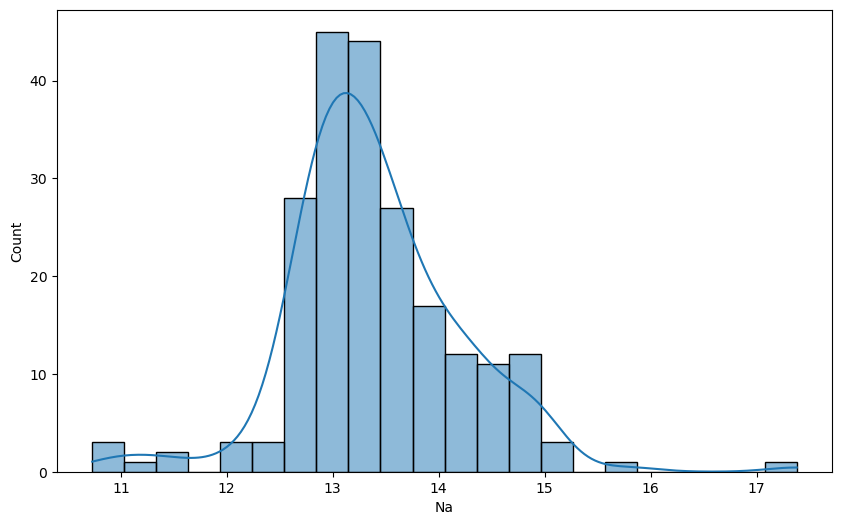

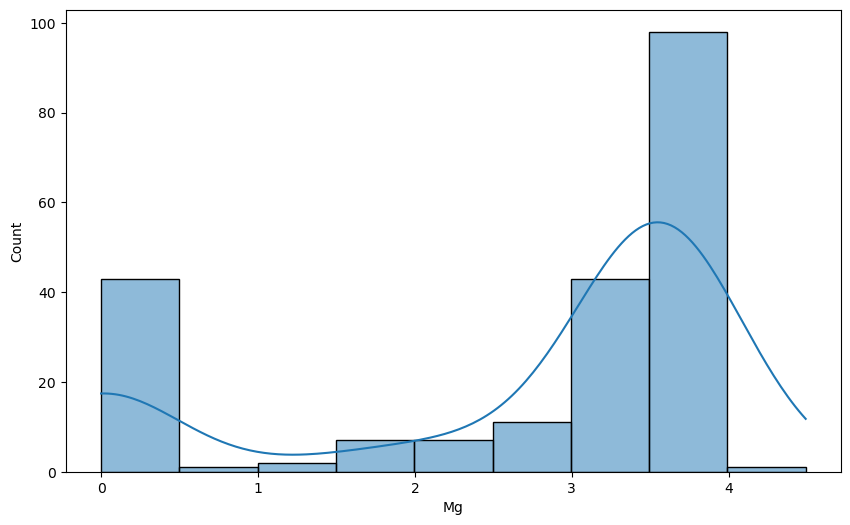

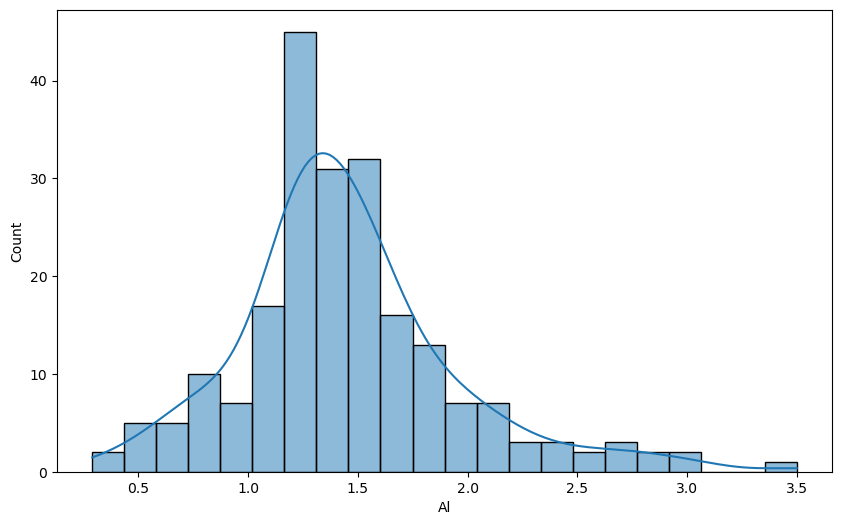

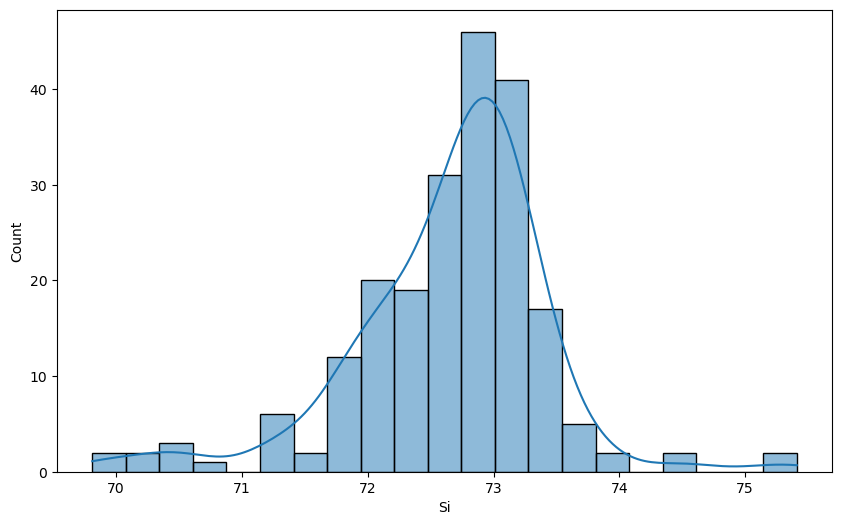

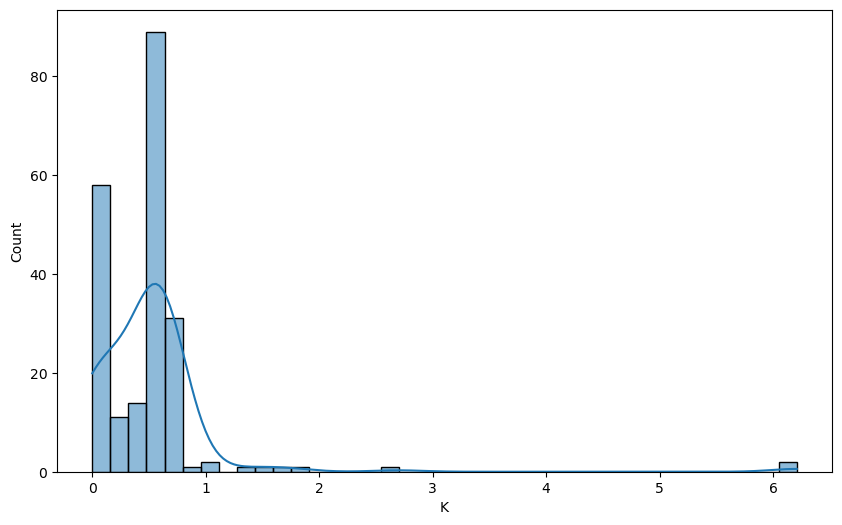

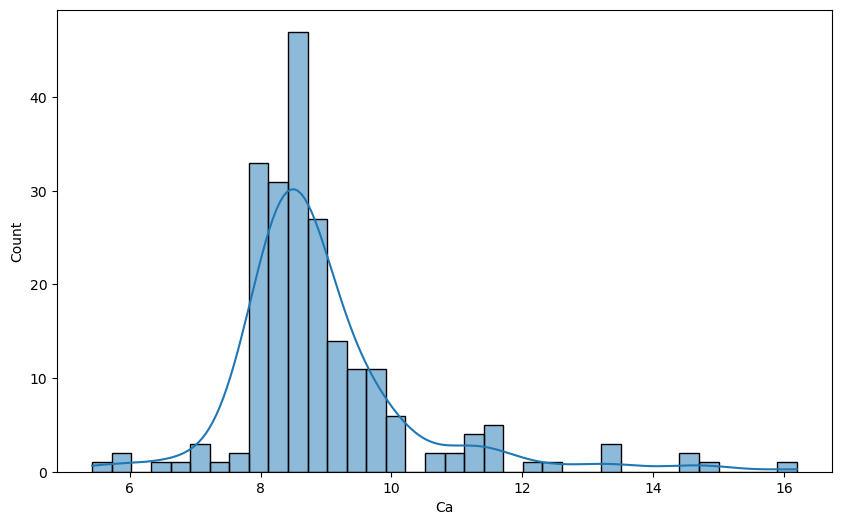

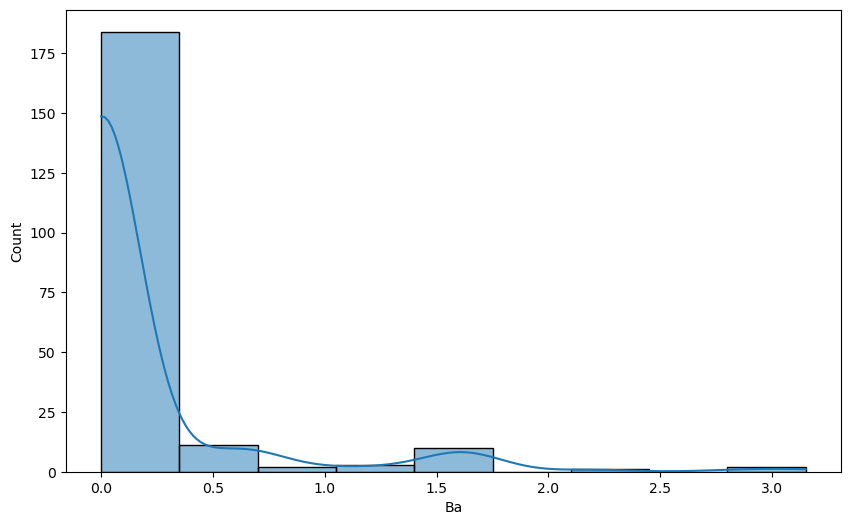

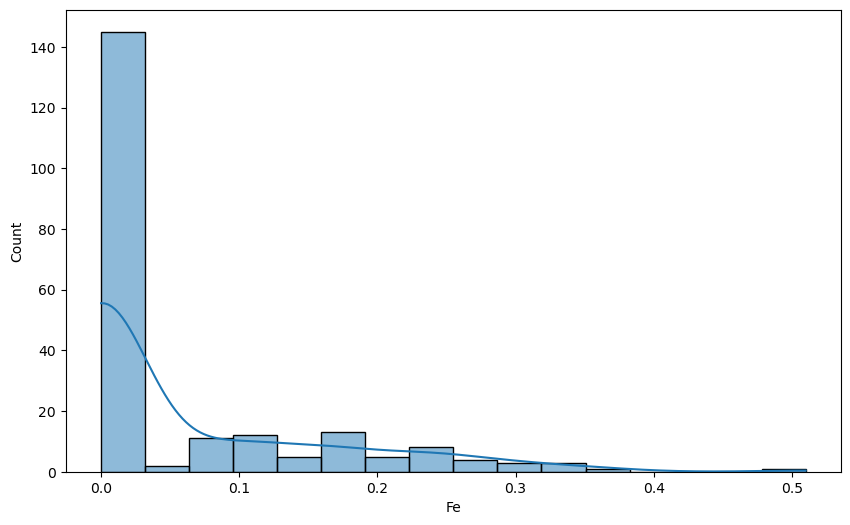

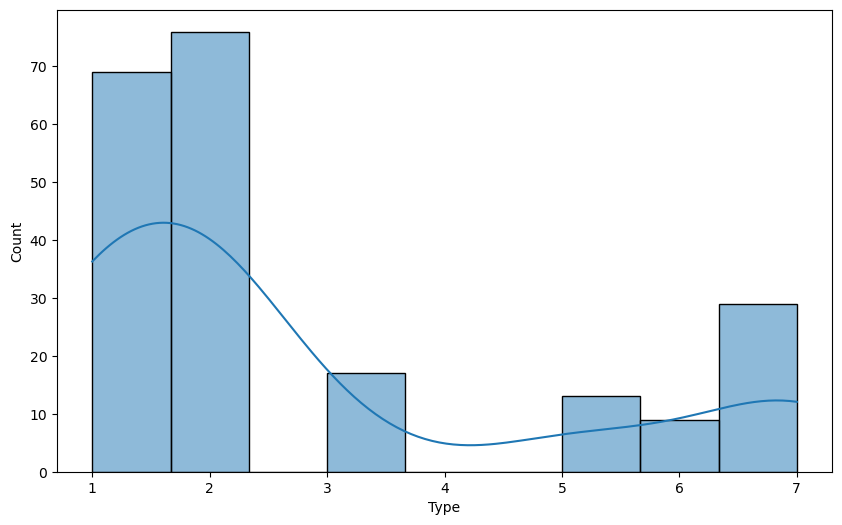

In [94]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[i],kde=True)
    plt.show()

In [95]:
num_feature = df.select_dtypes(include='number')
num_feature = num_feature.drop('Type',axis=1)
num_feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [96]:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: xlabel='Type'>

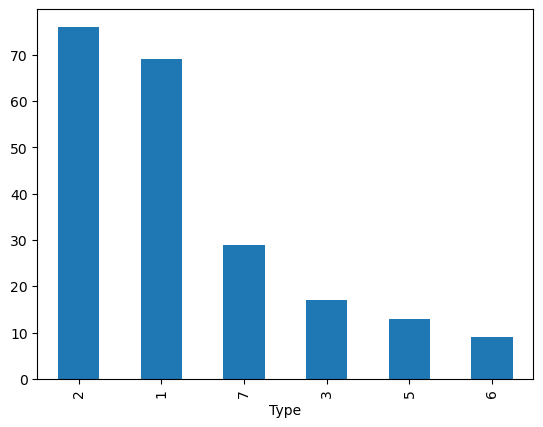

In [97]:
df['Type'].value_counts().plot(kind='bar')

In [98]:
X = df.drop('Type',axis=1)
y = df['Type']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [100]:
num_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

# pandas output
preprocessor.set_output(transform='pandas')


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba',
                                  'Fe'])])

In [101]:
models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {
            'logisticregression__C': [0.01, 0.1, 1, 10]
        }
    ),

    'SVM': (
        SVC(probability=True, class_weight='balanced'),
        {
            'svc__C': [0.1, 1, 10],
            'svc__kernel': ['linear', 'rbf']
        }
    ),

    'KNN': (
        KNeighborsClassifier(),
        {
            'kneighborsclassifier__n_neighbors': [3, 5, 7, 9]
        }
    ),

    'Decision Tree': (
        DecisionTreeClassifier(class_weight='balanced'),
        {
            'decisiontreeclassifier__max_depth': [None, 5, 10, 20]
        }
    ),

    'Random Forest': (
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            'randomforestclassifier__n_estimators': [100, 200],
            'randomforestclassifier__max_depth': [None, 10, 20]
        }
    )
}


In [102]:
results = []

for name, (model, params) in models.items():
    pipe = make_pipeline(preprocessor, model)

    gs = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)

    results.append({
        'Model': name,
        'Best Params': gs.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr')
    })


In [103]:
results_df = pd.DataFrame(results).sort_values(
    by='F1-score', ascending=False
)

results_df


,Model,Best Params,Accuracy,Precision,Recall,F1-score,ROC-AUC
4,Random Forest,"{'randomforestclassifier__max_depth': None, 'r...",0.837209,0.849612,0.837209,0.838157,0.979550
2,KNN,{'kneighborsclassifier__n_neighbors': 3},0.767442,0.787929,0.767442,0.751222,0.891436
1,SVM,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.720930,0.722080,0.720930,0.719323,0.944090
3,Decision Tree,{'decisiontreeclassifier__max_depth': 10},0.674419,0.680426,0.674419,0.658859,0.854562
0,Logistic Regression,{'logisticregression__C': 10},0.581395,0.630253,0.581395,0.570345,0.904994


In [104]:
lr = LogisticRegression(
    C=1,
    max_iter=1000,
    class_weight='balanced'
)

svm = SVC(
    C=1,
    kernel='rbf',
    probability=True,
    class_weight='balanced'
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)


In [105]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('svm', svm),
        ('rf', rf)
    ],
    voting='soft',
    n_jobs=-1
)


In [106]:
voting_pipe = make_pipeline(
    preprocessor,
    voting_clf
)

In [107]:
voting_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['RI', 'Na', 'Mg', 'Al', 'Si',
                                                   'K', 'Ca', 'Ba', 'Fe'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=1,
                                                                  class_weight='balanced',
                                                                  max_iter=1000)),
                                              ('svm',
                                               SVC(C=1, class_weight='balanced',
                                                   probability=True)),
                                              ('rf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      n_estimators=200,
                                                                      random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [108]:
y_pred = voting_pipe.predict(X_test)
y_proba = voting_pipe.predict_proba(X_test)

voting_results = {
    'Model': 'Voting Ensemble',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-score': f1_score(y_test, y_pred, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr')
}

voting_results


{'Model': 'Voting Ensemble',
 'Accuracy': 0.7906976744186046,
 'Precision': 0.8046511627906976,
 'Recall': 0.7906976744186046,
 'F1-score': 0.7842020850040097,
 'ROC-AUC': 0.9624242393901771}

In [109]:
results_df = pd.concat(
    [results_df, pd.DataFrame([voting_results])],
    ignore_index=True
).sort_values(by='F1-score', ascending=False)

results_df

,Model,Best Params,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Random Forest,"{'randomforestclassifier__max_depth': None, 'r...",0.837209,0.849612,0.837209,0.838157,0.979550
5,Voting Ensemble,NaN,0.790698,0.804651,0.790698,0.784202,0.962424
1,KNN,{'kneighborsclassifier__n_neighbors': 3},0.767442,0.787929,0.767442,0.751222,0.891436
2,SVM,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.720930,0.722080,0.720930,0.719323,0.944090
3,Decision Tree,{'decisiontreeclassifier__max_depth': 10},0.674419,0.680426,0.674419,0.658859,0.854562
4,Logistic Regression,{'logisticregression__C': 10},0.581395,0.630253,0.581395,0.570345,0.904994
